### Work with Diabents Datasets

In [5]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data,
                           columns=diabetes.feature_names)
df['target'] = diabetes.target

print(df.head())

        age       sex       bmi        bp  ...        s4        s5        s6  target
0  0.038076  0.050680  0.061696  0.021872  ... -0.002592  0.019907 -0.017646   151.0
1 -0.001882 -0.044642 -0.051474 -0.026328  ... -0.039493 -0.068332 -0.092204    75.0
2  0.085299  0.050680  0.044451 -0.005670  ... -0.002592  0.002861 -0.025930   141.0
3 -0.089063 -0.044642 -0.011595 -0.036656  ...  0.034309  0.022688 -0.009362   206.0
4  0.005383 -0.044642 -0.036385  0.021872  ... -0.002592 -0.031988 -0.046641   135.0

[5 rows x 11 columns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [8]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

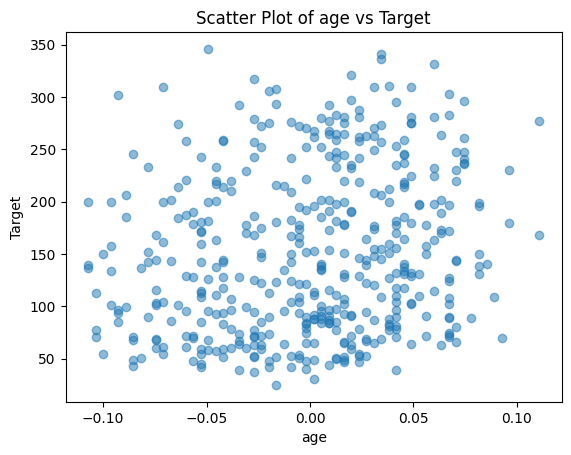

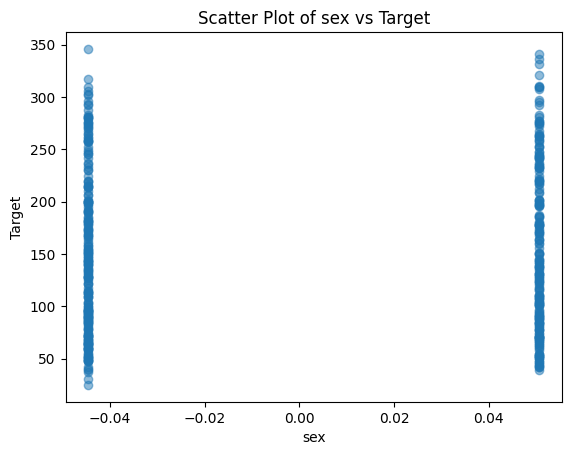

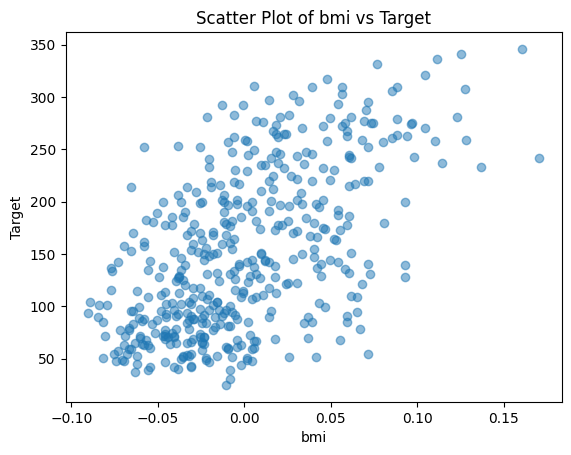

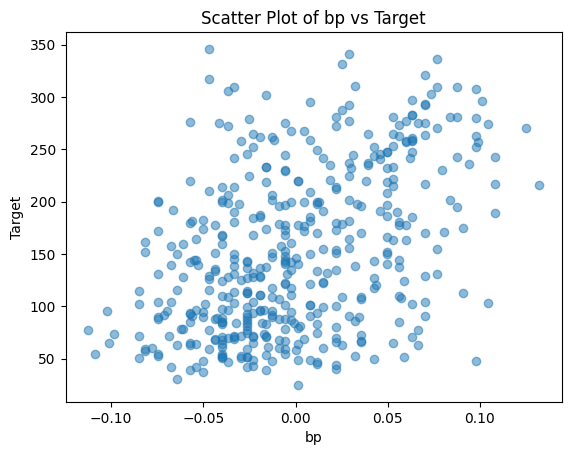

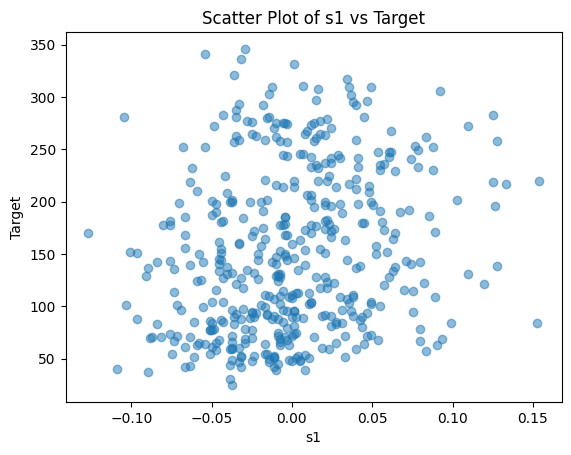

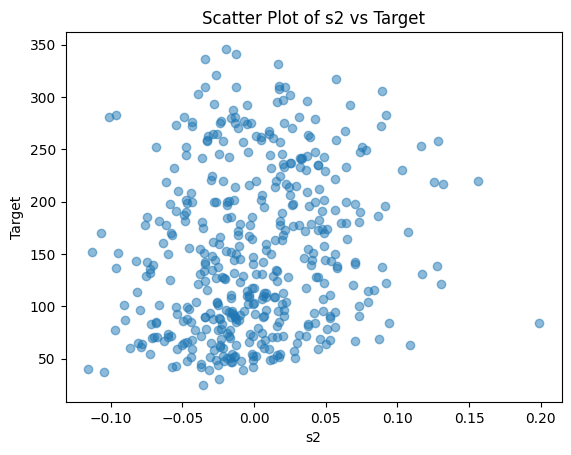

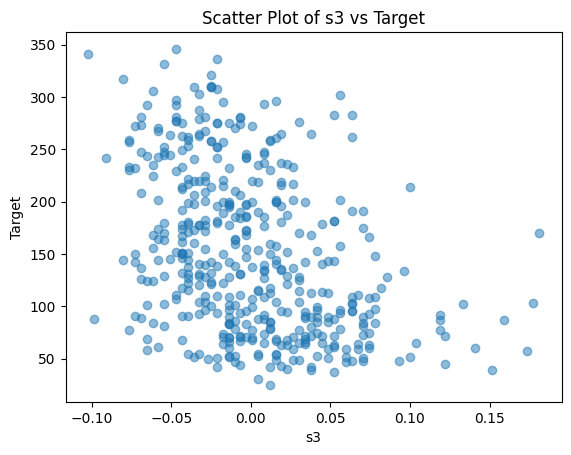

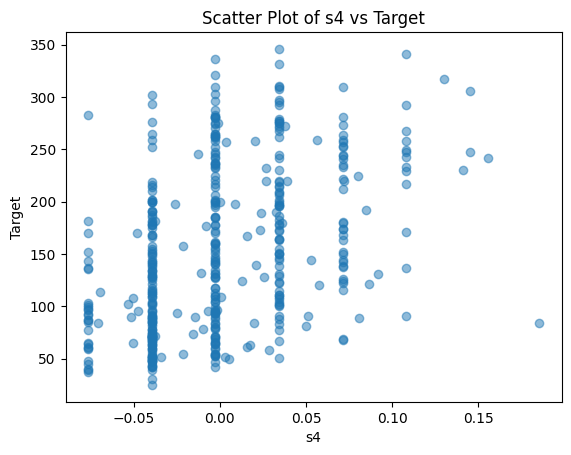

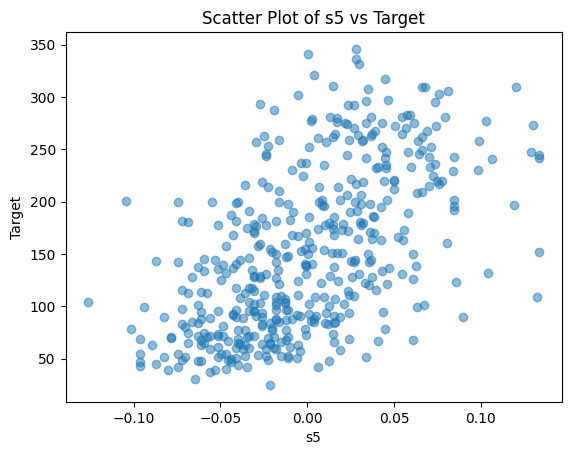

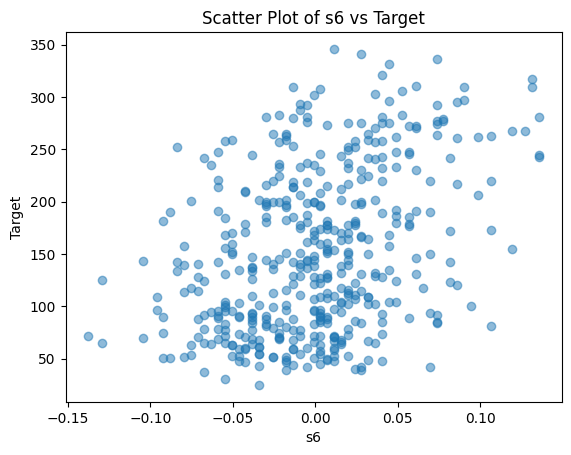

In [9]:
X = df.drop(columns=['target'])
Y = df['target']
for feature in X.columns:
    plt.scatter(X[feature], Y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Target")
    plt.title(f"Scatter Plot of {feature} vs Target")
    plt.show()

<Axes: >

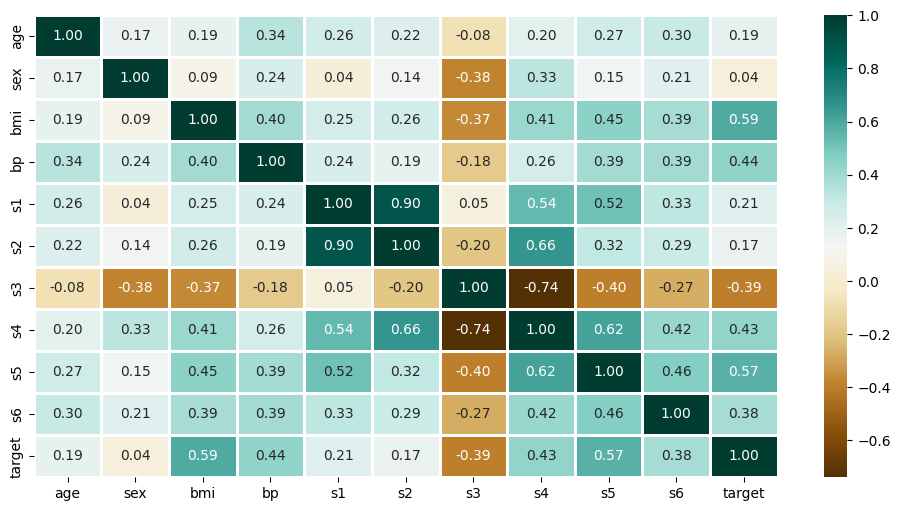

In [10]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

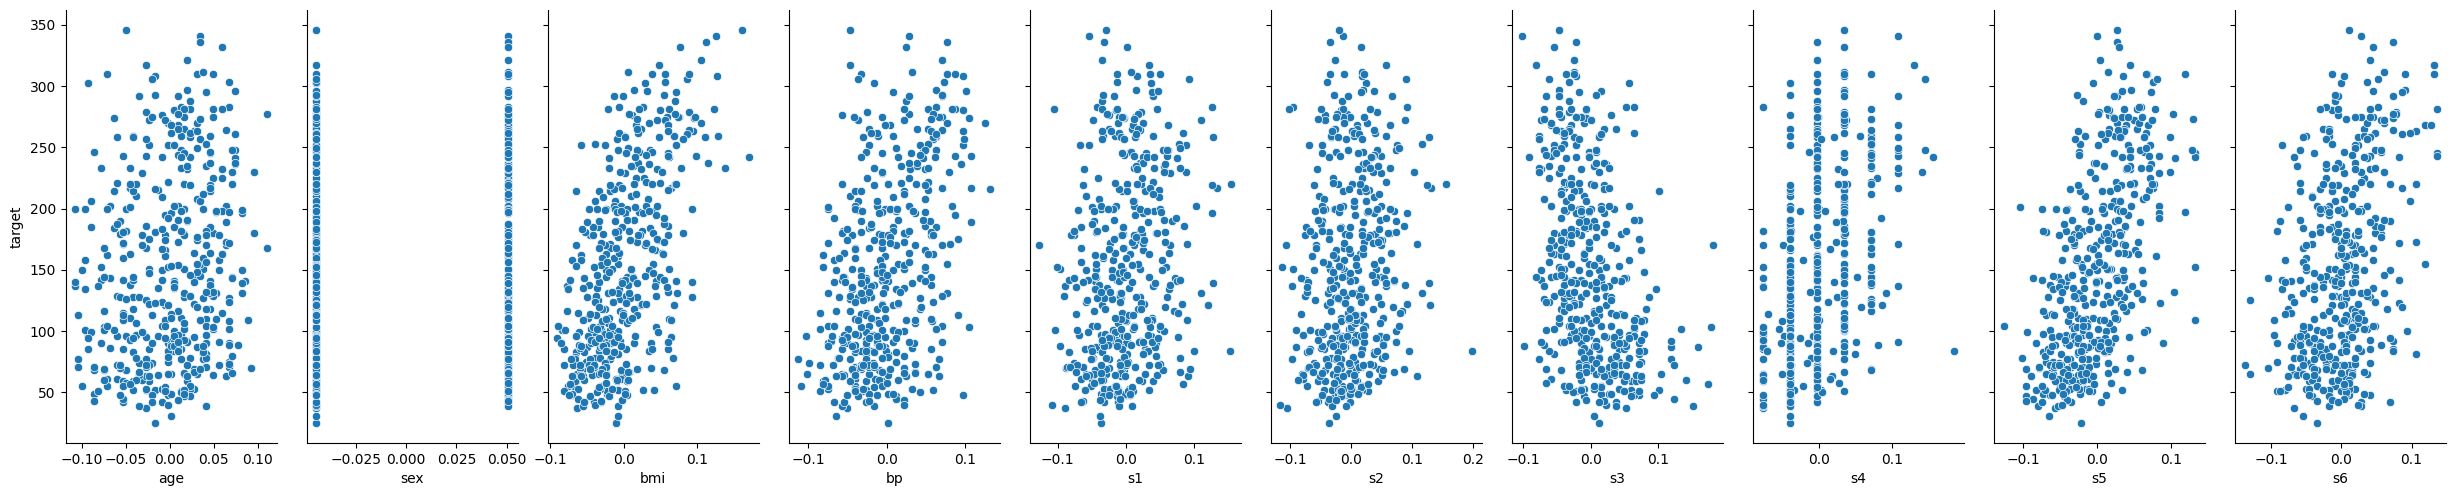

In [11]:
sns.pairplot(df, x_vars=diabetes.feature_names, y_vars='target', height=5, aspect=0.5)
plt.show()

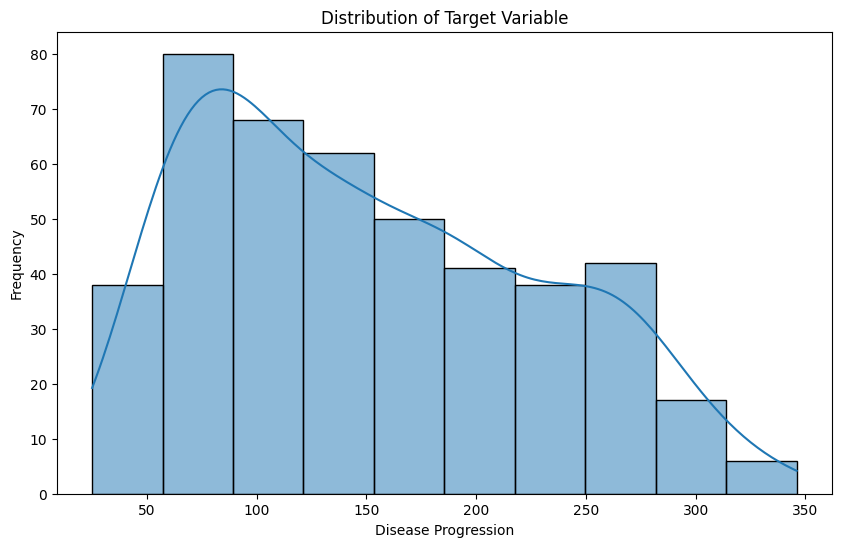

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'],axis=1)
Y = df['target']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((309, 10), (133, 10), (309,), (133,))

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
}

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

results = {}

for name, func in models.items():
    func.fit(X_train,Y_train) 
    Y_pred = func.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    results[name] = {'mse': mse, 'r2': r2}
    print(f"MSE for {name} MSE: {mse}, R2: {r2}")


MSE for Linear Regression MSE: 2827.084017424083, R2: 0.43845439143447795
MSE for Ridge MSE: 3069.889205027365, R2: 0.3902258329639082
MSE for Lasso MSE: 3439.7198400307934, R2: 0.3167661240485715
MSE for ElasticNet MSE: 5027.789291879944, R2: 0.001326815811990678


In [16]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid for Ridge, Lasso, and Elastic Net
param_grid = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}
}

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Perform cross-validation and hyperparameter tuning
best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train, Y_train)
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For Linear Regression, just perform cross-validation
        scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        best_models[name] = model
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")

print()
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(Y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: Cross-validation RMSE = 56.0418
Best Ridge: {'alpha': 0.1}, RMSE = 55.7742
Best Lasso: {'alpha': 0.01}, RMSE = 55.8669
Best ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.9}, RMSE = 56.5341

Evaluate the best models on the test set
Linear Regression: RMSE = 53.1703, R2 = 0.4385
Ridge: RMSE = 53.2094, R2 = 0.4376
Lasso: RMSE = 53.3844, R2 = 0.4339
ElasticNet: RMSE = 53.4528, R2 = 0.4325
